In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import scipy.stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import plotly.express as pltx


import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

#Sarah Al Badri




Data was retrieved from Kaggle

Features:

-  id: unique identifier
-  gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



In [2]:
# Digital signatures: check the integrity of my data
#To check if the data was corrupted or tampered with

#- shasum -c shasum.txt this shoudl return ok if not tampered with or failed if the file was tempred with
# returned ok

In [280]:
stroke= pd.read_csv("/.../.../.../stroke_prediction_Fully_balanced/healthcare-dataset-stroke-data.csv")

In [36]:
#lets print 5 random samples from the data
stroke.sample(5)

id  gender    age  hypertension  heart_disease ever_married  \
2097  24342  Female  23.00             0              0           No   
972   19101  Female  16.00             0              0           No   
1376  43905  Female  64.00             0              0           No   
4053  40255  Female   0.48             0              0           No   
3109   3553  Female  43.00             0              0          Yes   

     work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
2097   Private          Rural             112.30  26.6        Unknown       0  
972    Private          Urban              87.98  22.4   never smoked       0  
1376  Govt_job          Rural             108.10  17.9   never smoked       0  
4053  children          Rural             118.75  17.4        Unknown       0  
3109  Govt_job          Urban             104.55  23.9         smokes       0

In [12]:
def EDA(data):
    #get shape of the data
    #checking for null values
    #distribution of the target variable
    #check for duplicate
    # check for empty strings
    print(f'''
    \n------------------------------------------------\n

    \nShape of the data:\n{data.shape}
    \n------------------------------------------------\n

    \n Null Values:\n{data.isnull().sum()} 
    \n------------------------------------------------\n

    \nDistribution of the target variable Stroke: Patient had stroke or not? (1 if the patient had a stroke or 0 if not):\n{data['stroke'].value_counts()}
    \nVisualizing the distribution\n 
    ''' )
    plot= sns.countplot(data['stroke'])
    plot.set_title("Distribution of the target variable: stroke")
    plt.show()
    
    print(f'''
    \n------------------------------------------------\n
    \nDuplicated data:\n{ data.duplicated().sum()} 
    \n------------------------------------------------\n

    \n Empty strings:\n{np.where(data.applymap(lambda x: x==" "))}\n
    ''' )

   




    
------------------------------------------------


    
Shape of the data:
(5110, 12)
    
------------------------------------------------


    
 Null Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 
    
------------------------------------------------


    
Distribution of the target variable Stroke: Patient had stroke or not? (1 if the patient had a stroke or 0 if not):
0    4861
1     249
Name: stroke, dtype: int64
    
Visualizing the distribution
 
    


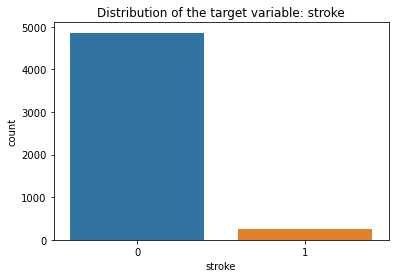


    
------------------------------------------------

    
Duplicated data:
0 
    
------------------------------------------------


    
 Empty strings:
(array([], dtype=int64), array([], dtype=int64))

    


In [13]:
EDA(stroke)

- lets check to see if bmi was missing at random
- true means it was missing and false is the opposite

In [6]:
stroke.groupby(stroke['bmi'].isnull()).mean()

id        age  hypertension  heart_disease  \
bmi                                                           
False  37064.313506  42.865374      0.091872       0.049501   
True   23171.109453  52.049154      0.233831       0.164179   

       avg_glucose_level        bmi    stroke  
bmi                                            
False         105.305150  28.893237  0.042575  
True          126.724627        NaN  0.199005

- It looks like it missing at random

In [9]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [281]:
continous=[]
categorical=[]
for feature in stroke.columns:
    if stroke[feature].dtype  == 'object':
        categorical.append(feature)
    else:
        continous.append(feature)

In [282]:
print(categorical)
print(continous)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [261]:
#lets explore continous features: we create a list of categorical features then drop them out of the data


stroke.drop(categorical, axis=1, inplace=True)

In [262]:
stroke.head()

id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke
0   9046  67.0             0              1             228.69  36.6       1
1  51676  61.0             0              0             202.21   NaN       1
2  31112  80.0             0              1             105.92  32.5       1
3  60182  49.0             0              0             171.23  34.4       1
4   1665  79.0             1              0             174.12  24.0       1

In [41]:
stroke.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [236]:
# lets create age group
age_group= pd.cut(stroke['age'],bins=[0, 10,20,30,40,60, 100])

In [239]:
pd.crosstab(age_group,stroke['stroke'])


stroke        0    1
age                 
(0, 10]     506    1
(10, 20]    517    1
(20, 30]    545    0
(30, 40]    668    6
(40, 60]   1498   64
(60, 100]  1127  177

In [244]:
stroke.groupby(age_group)['heart_disease','hypertension','stroke'].value_counts()

age        heart_disease  hypertension  stroke
(0, 10]    0              0             0          505
                                        1            1
           1              0             0            1
                                        1            0
           0              1             0            0
           1              1             1            0
           0              1             1            0
           1              1             0            0
(10, 20]   0              0             0          515
                          1             0            2
                          0             1            1
                          1             1            0
           1              0             0            0
                                        1            0
                          1             0            0
                                        1            0
(20, 30]   0              0             0          535
                  

In [252]:
#print out all columns and rows
#pd.set_option("display.max_rows", None, "display.max_columns", None)



In [21]:
stroke['id'].value_counts().count()

5110

- From above we see age has wide range lets further explore it
- Hypertension is catergorical nominal
- heart disease is categorical nominal
- avg clugose leve has high std
- stroke mean 0.04 (categorical nominal) more no stroke ration to stroke

In [22]:
# lets groupby target variabel
stroke.groupby('stroke').mean()

id        age  hypertension  heart_disease  \
stroke                                                         
0       36487.236371  41.971545      0.088871       0.047110   
1       37115.068273  67.728193      0.265060       0.188755   

        avg_glucose_level        bmi  
stroke                                
0              104.795513  28.823064  
1              132.544739  30.471292

In [23]:
stroke.groupby(stroke['bmi'].isnull())['stroke'].mean()

bmi
False    0.042575
True     0.199005
Name: stroke, dtype: float64

-  Age: significant difference in the mean for people with stroke and normal (no stroke)
- Hypertension: significan diff in the mean for people with stroke and normal people (no strok) Hyper tension is categorical nominal.
- heart disease: significant difference in the mean of people who have strok and those who do not
- avg glucose: significant diff in the mean of people with stroke and those who are normal (no stroke)
- bmi higher for people with strok (has missing values).

In [253]:
stroke.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.131945  0.042374  1.000000

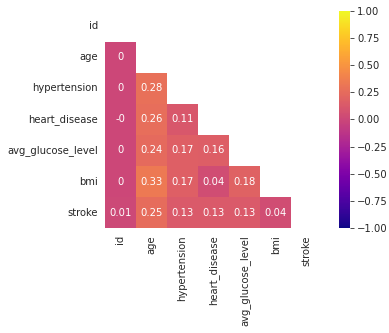

In [254]:
mask = np.zeros_like(round(stroke.corr(),2), dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
    ax = sns.heatmap(round(stroke.corr(),2), mask=mask, vmin=-1, vmax=1, square=True, cmap = 'plasma',annot= True)

plt.show()

- seems like none of the features is a strong indicator of stroke (age has the highest correlation of 0.25)
- age correlated weakly with other features. highest correlation with bmi 
- bmi almost uncorrelated with strok. bmi has higher correlation with age than with stroke


# Plot Contious Features

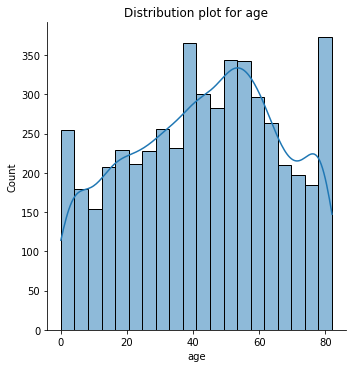

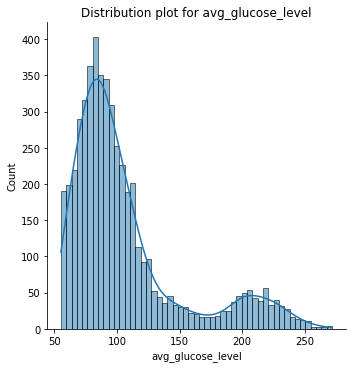

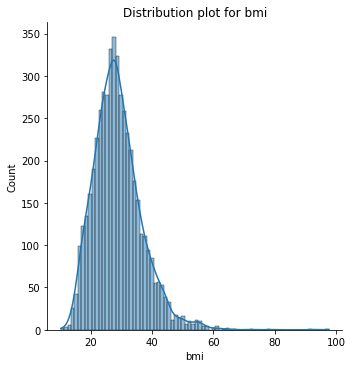

In [283]:
# hypertension and heart disease are nominal
l=['age', 'avg_glucose_level','bmi']
for i in l:
    sns.displot(stroke[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.show()

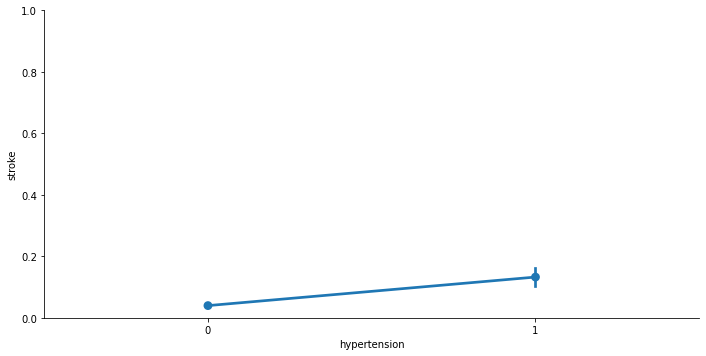

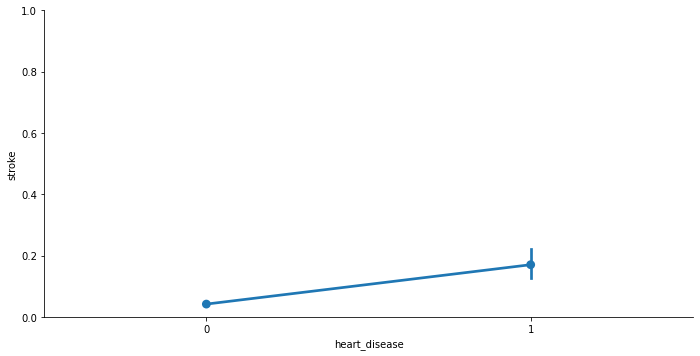

In [288]:
nominal= ['hypertension','heart_disease']
for i in nominal:
    sns.catplot(x=i, y='stroke', data=stroke, kind='point',  aspect = 2)
    plt.ylim(0,1)
    

In [ ]:
# Lets plot overlaid Histogram to visulaize dist of target variable(stroke, no stroke)

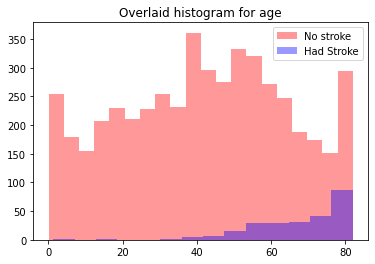

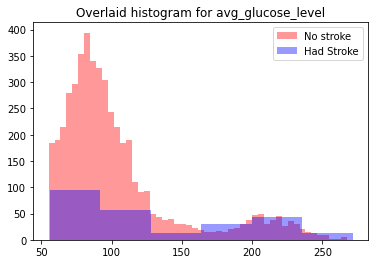

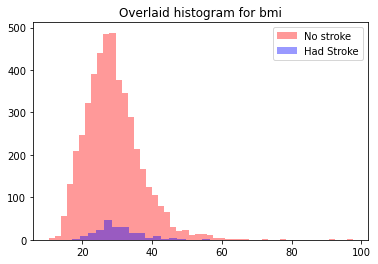

In [323]:
# adapted from Derek Jedamski

for i in l:
    no_stroke = list(stroke[stroke['stroke']==0][i].dropna())# 1 had stroke, 0 : no stroke
    had_stroke = list(stroke[stroke['stroke']==1][i].dropna())
    sns.distplot(no_stroke, color= 'red', kde = False )
    sns.distplot(had_stroke, color= 'blue', kde = False )
    plt.legend(['No stroke','Had Stroke'])
    plt.title(f'Overlaid histogram for {i}')
    plt.show()

# <font color = brown>Exploring the Categorical Features</font>

In [325]:
stroke= pd.read_csv("/.../.../.../healthcare-dataset-stroke-data.csv")

In [326]:
stroke.drop(continous, axis=1, inplace=True)

In [327]:
# lets print five random samples
stroke.sample(5)

gender ever_married      work_type Residence_type   smoking_status
3751  Female           No        Private          Urban     never smoked
3327  Female           No  Self-employed          Urban     never smoked
1043  Female          Yes        Private          Urban  formerly smoked
3465  Female          Yes        Private          Rural     never smoked
1237  Female          Yes       Govt_job          Rural     never smoked

In [328]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          5110 non-null   object
 1   ever_married    5110 non-null   object
 2   work_type       5110 non-null   object
 3   Residence_type  5110 non-null   object
 4   smoking_status  5110 non-null   object
dtypes: object(5)
memory usage: 199.7+ KB


In [329]:
# keep in mind that we have missing values under feature=smoking status (missing labeld as unknown so it wont be recognized)
stroke.isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [330]:
# explore number of unique values for each column
for col in stroke.columns:
    print(f"""{col} :{stroke[col].nunique()} Unique Values 
              \n  --Which are: {stroke[col].unique()}\n 
              """)
    

gender :3 Unique Values 
              
  --Which are: ['Male' 'Female' 'Other']
 
              
ever_married :2 Unique Values 
              
  --Which are: ['Yes' 'No']
 
              
work_type :5 Unique Values 
              
  --Which are: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
 
              
Residence_type :2 Unique Values 
              
  --Which are: ['Urban' 'Rural']
 
              
smoking_status :4 Unique Values 
              
  --Which are: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
 
              


In [34]:
#check strok presence by each categorical feature
for i in['gender','ever_married','work_type','Residence_type','smoking_status']:
    print(stroke.groupby(i).mean())

          stroke
gender          
Female  0.047094
Male    0.051064
Other   0.000000
                stroke
ever_married          
No            0.016505
Yes           0.065613
                 stroke
work_type              
Govt_job       0.050228
Never_worked   0.000000
Private        0.050940
Self-employed  0.079365
children       0.002911
                  stroke
Residence_type          
Rural           0.045346
Urban           0.052003
                   stroke
smoking_status           
Unknown          0.030440
formerly smoked  0.079096
never smoked     0.047569
smokes           0.053232


- gender:does not seem like a good indicator
- ever_married: seems like strong indicator. stroke higher btw married people
- work_type:does not seems like good indicator. however, strok higher btw self employed and absent btw people who never employed( which could be young healthy people who still in school)
- Residency_type: does not seem like s good indicator. almost the same 
- smoking status: higher stroke btw fomerly smoked. it does not seem like a good indicator

# Data Cleaning

# <font color =brown>Data cleaning and preperation list:</font>
- 201 missing values in bmi
- check if bmi was missing at random
-  <font color = red>_Note_: </font>Unkonwn smoking status meaning its missing will replace all unknown with NaN during cleaning phase. and then check if it was missing at random
- our data is imbalanced: we have 4861 did not have stroke and 249 had stroke
- drop id column as it has no distigushing power(not an indicator of whether someone has stroke or not)
- age floor and cap
- bmi has higher correlation with age than with stroke. check if dropping bmi improve the performance of our model. 
- check if dropping work_type improves the performance of our model. 
- check dropping residency type improves performace of our model. 
 
- check if dropping smoking status would improve performance of our model; it has alot of missing values 



In [332]:
stroke= pd.read_csv("/.../.../.../healthcare-dataset-stroke-data.csv")
stroke.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [333]:
# replace unknown in smoking status with NaN
stroke['smoking_status']= stroke['smoking_status'].replace("Unknown", np.nan)

In [334]:
#print out 20 randome samples
stroke.sample(20)

id  gender   age  hypertension  heart_disease ever_married  \
1931  41911  Female  21.0             0              0          Yes   
1659  32776    Male  63.0             0              0          Yes   
2585  37307  Female  35.0             0              0          Yes   
1061   8332  Female  50.0             0              0          Yes   
636    3579  Female  66.0             0              1          Yes   
1966  49775    Male  40.0             0              0          Yes   
3587  14000  Female  72.0             1              1          Yes   
4112  41238  Female  36.0             0              0          Yes   
4879  32617    Male   3.0             0              0           No   
944   44105  Female  69.0             1              0          Yes   
2551  23748  Female  31.0             0              0          Yes   
3445  22607  Female  41.0             0              0          Yes   
97    56841    Male  58.0             0              1          Yes   
4397  33657  Female  64.0             0              0          Yes   
4714  63467    Male   9.0             0              0           No   
1531  49709  Female  77.0             1              0          Yes   
1618  45976    Male  56.0             0              0          Yes   
4697   3612    Male  67.0             0              0          Yes   
3360   4753    Male  82.0             0              1          Yes   
3951   2467  Female  79.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1931        Private          Rural             149.90  23.4              NaN   
1659        Private          Urban             199.14  28.5     never smoked   
2585        Private          Urban              65.48  50.5     never smoked   
1061        Private          Rural             206.25  53.4  formerly smoked   
636         Private          Urban              94.62  29.7  formerly smoked   
1966        Private          Rural              75.40  28.7              NaN   
3587        Private          Urban             198.32  31.3  formerly smoked   
4112        Private          Urban              72.16  23.2     never smoked   
4879       children          Urban              81.88  18.0              NaN   
944   Self-employed          Urban              61.81  37.1              NaN   
2551        Private          Urban              92.16  22.8     never smoked   
3445        Private          Urban             103.79  28.6     never smoked   
97          Private          Rural             240.59  31.4           smokes   
4397        Private          Urban              95.87  19.3  formerly smoked   
4714       children          Urban             150.00  17.4              NaN   
1531  Self-employed          Rural             238.53  30.6     never smoked   
1618        Private          Urban              84.30  22.1              NaN   
4697        Private          Rural              86.96  31.4  formerly smoked   
3360  Self-employed          Urban             228.92  27.9  formerly smoked   
3951  Self-employed          Rural              92.43   NaN     never smoked   

      stroke  
1931       0  
1659       0  
2585       0  
1061       0  
636        0  
1966       0  
3587       0  
4112       0  
4879       0  
944        0  
2551       0  
3445       0  
97         1  
4397       0  
4714       0  
1531       0  
1618       0  
4697       0  
3360       0  
3951       0

In [335]:
stroke.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [336]:
# save data with edited smoking_status (unknown replaced with nan) 
stroke.to_csv("/.../.../.../stroke.csv", index=False)

In [337]:
stroke= pd.read_csv("/.../.../.../stroke.csv")

In [338]:
# check if smoking status missing at random
stroke.groupby(stroke['smoking_status'].isnull()).mean()

id        age  hypertension  heart_disease  \
smoking_status                                                         
False           36785.750701  48.853898      0.125070       0.063937   
True            35899.042098  30.229922      0.033679       0.031088   

                avg_glucose_level        bmi    stroke  
smoking_status                                          
False                  108.982011  30.290047  0.056646  
True                    99.601541  25.666352  0.030440

In [339]:
stroke.groupby(stroke['smoking_status'].isnull())['stroke'].mean()

smoking_status
False    0.056646
True     0.030440
Name: stroke, dtype: float64

- not a significant difference

In [340]:
# check again if bmi missing at random
stroke.groupby(stroke['bmi'].isnull()).mean()

id        age  hypertension  heart_disease  \
bmi                                                           
False  37064.313506  42.865374      0.091872       0.049501   
True   23171.109453  52.049154      0.233831       0.164179   

       avg_glucose_level        bmi    stroke  
bmi                                            
False         105.305150  28.893237  0.042575  
True          126.724627        NaN  0.199005

In [341]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# <font color=Green> Fill in missing values</font>
- for bmi (continous variable) will fill in with mean
- for smoking status (categorical value)will fill in with most common value (mode). 
- will create new clean features out of the old features. so we can check later how much has the cleanning impact on model performance.

In [342]:
# fill in missing values for bmi
stroke['bmi_clean']= stroke['bmi'].fillna(stroke['bmi'].mean())

In [343]:
stroke['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

In [344]:
# fill in missing values for smoking_status with the most frequent value(mode)
from sklearn.impute import SimpleImputer
stroke['smoking_status_clean']= stroke['smoking_status'].fillna('never smoked')

In [345]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5110 non-null   int64  
 1   gender                5110 non-null   object 
 2   age                   5110 non-null   float64
 3   hypertension          5110 non-null   int64  
 4   heart_disease         5110 non-null   int64  
 5   ever_married          5110 non-null   object 
 6   work_type             5110 non-null   object 
 7   Residence_type        5110 non-null   object 
 8   avg_glucose_level     5110 non-null   float64
 9   bmi                   4909 non-null   float64
 10  smoking_status        3566 non-null   object 
 11  stroke                5110 non-null   int64  
 12  bmi_clean             5110 non-null   float64
 13  smoking_status_clean  5110 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 559.0+ KB


In [346]:
# lets make sure that we filled in all missing values 
stroke.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
bmi                      201
smoking_status          1544
stroke                     0
bmi_clean                  0
smoking_status_clean       0
dtype: int64

In [347]:
# Lets drop id column, bmi, and smoking status form our data as its unnecessary
lis= ['id','bmi','smoking_status' ]
stroke.drop(lis, axis=1, inplace=True)

In [348]:
stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level  stroke  bmi_clean smoking_status_clean  
0          Urban             228.69       1  36.600000      formerly smoked  
1          Rural             202.21       1  28.893237         never smoked  
2          Rural             105.92       1  32.500000         never smoked  
3          Urban             171.23       1  34.400000               smokes  
4          Rural             174.12       1  24.000000         never smoked

In [349]:
stroke.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
stroke                  0
bmi_clean               0
smoking_status_clean    0
dtype: int64

In [350]:
stroke.to_csv("/.../.../.../stroke_cleaned.csv", index=False)

# <font color = Red> Using Z-score and BoxPlot to Detect Outliers
<font color = green> z-score referes to how many standard of deviations (std) a data point is above or below the mean

<font color = green>$ Z-Score = \frac{(x-\mu)}{\sigma} $

<font color = green>where, 
<font color = green>$x$ = $data$ $point$

<font color = green><font color = green> $\mu = mean$

<font color = green> $\sigma = std$



In [3]:
# Adapted from Derek Jedamski
def detect_outlier(feature):
    outliers = []
    data = stroke[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f'\nOutlier caps for {feature}:')
    print(f'  95p: {data.quantile(.95)}')                                 
    print(f'  3sd: {mean + 3*(std)}' )
    print(f'  99p: {data.quantile(.99)}')
    print(f'\nOutlier floor for {feature}:')                                                      
    print(f'  0.5p: {data.quantile(.05)}')                                 
    print(f'  3sd: {mean - 3*(std)}')
    print(f'  1: {data.quantile(.01)}')
    fig = pltx.histogram(stroke, x =feature, marginal='box')
    fig.show()



In [355]:
stroke.sample(2)

gender   age  hypertension  heart_disease ever_married work_type  \
338  Female  54.0             0              0          Yes  Govt_job   
167    Male  79.0             1              0          Yes   Private   

    Residence_type  avg_glucose_level  stroke  bmi_clean smoking_status_clean  
338          Rural              91.61       0  25.200000         never smoked  
167          Rural              75.02       1  28.893237         never smoked

In [4]:
# Determine what the upperbound and lowerbound should be for continous features
features=['age','avg_glucose_level','bmi_clean']
for feat in features:
    detect_outlier(feat)







Outlier caps for age:
  95p: 79.0
  3sd: 111.05791656274805
  99p: 82.0

Outlier floor for age:
  0.5p: 5.0
  3sd: -24.604687599930017
  1: 1.08



Outlier caps for avg_glucose_level:
  95p: 216.29450000000003
  3sd: 241.9850642748949
  99p: 240.7082

Outlier floor for avg_glucose_level:
  0.5p: 60.7135
  3sd: -29.689710067458847
  1: 56.3309



Outlier caps for bmi_clean:
  95p: 42.65500000000002
  3sd: 51.98503058968129
  99p: 52.890999999999984

Outlier floor for bmi_clean:
  0.5p: 17.7
  3sd: 5.801443233908149
  1: 15.109


In [359]:
# cap avg_glucose_level, bmi_clean
stroke['avg_glucose_level_cap']= stroke['avg_glucose_level'].clip(upper=stroke['avg_glucose_level'].quantile(.99))
stroke['bmi_clean_cap']= stroke['bmi_clean'].clip(upper=stroke['bmi_clean'].quantile(.99))

In [360]:
stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level  stroke  bmi_clean smoking_status_clean  \
0          Urban             228.69       1  36.600000      formerly smoked   
1          Rural             202.21       1  28.893237         never smoked   
2          Rural             105.92       1  32.500000         never smoked   
3          Urban             171.23       1  34.400000               smokes   
4          Rural             174.12       1  24.000000         never smoked   

   avg_glucose_level_cap  bmi_clean_cap  
0                 228.69      36.600000  
1                 202.21      28.893237  
2                 105.92      32.500000  
3                 171.23      34.400000  
4                 174.12      24.000000

In [361]:
stroke.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

            stroke    bmi_clean  avg_glucose_level_cap  bmi_clean_cap  
count  5110.000000  5110.000000            5110.000000    5110.000000  
mean      0.048728    28.893237             106.041526      28.831501  
std       0.215320     7.698018              44.947080       7.427186  
min       0.000000    10.300000              55.120000      10.300000  
25%       0.000000    23.800000              77.245000      23.800000  
50%       0.000000    28.400000              91.885000      28.400000  
75%       0.000000    32.800000             114.090000      32.800000  
max       1.000000    97.600000             240.708200      52.891000

In [362]:
stroke.to_csv("/.../.../.../stroke_cleaned_capped.csv", index=False)

# <font color =Green>Transform Skewed Features</font>

In [363]:
stroke=pd.read_csv("/.../.../.../stroke_cleaned_capped.csv")

In [364]:
stroke.sample(10)

gender    age  hypertension  heart_disease ever_married work_type  \
4549  Female  17.00             0              0           No   Private   
2027  Female  58.00             0              0          Yes   Private   
2511    Male  28.00             0              0           No   Private   
4910  Female   0.32             0              0           No  children   
5061    Male  41.00             0              0          Yes   Private   
2444  Female  80.00             0              0          Yes   Private   
3880  Female  26.00             0              0           No   Private   
1218    Male   1.88             0              0           No  children   
2221    Male  55.00             0              1           No   Private   
3361    Male  48.00             0              0          Yes   Private   

     Residence_type  avg_glucose_level  stroke  bmi_clean  \
4549          Rural              79.62       0       21.6   
2027          Rural             107.17       0       27.7   
2511          Urban             116.02       0       36.6   
4910          Urban             108.63       0       19.6   
5061          Urban             223.78       0       32.3   
2444          Urban              79.57       0       26.9   
3880          Rural              90.54       0       37.1   
1218          Rural              77.91       0       21.8   
2221          Urban              56.90       0       28.2   
3361          Rural              62.89       0       29.6   

     smoking_status_clean  avg_glucose_level_cap  bmi_clean_cap  
4549         never smoked                  79.62           21.6  
2027         never smoked                 107.17           27.7  
2511      formerly smoked                 116.02           36.6  
4910         never smoked                 108.63           19.6  
5061         never smoked                 223.78           32.3  
2444         never smoked                  79.57           26.9  
3880         never smoked                  90.54           37.1  
1218         never smoked                  77.91           21.8  
2221         never smoked                  56.90           28.2  
3361         never smoked                  62.89           29.6

In [365]:
stroke.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

            stroke    bmi_clean  avg_glucose_level_cap  bmi_clean_cap  
count  5110.000000  5110.000000            5110.000000    5110.000000  
mean      0.048728    28.893237             106.041526      28.831501  
std       0.215320     7.698018              44.947080       7.427186  
min       0.000000    10.300000              55.120000      10.300000  
25%       0.000000    23.800000              77.245000      23.800000  
50%       0.000000    28.400000              91.885000      28.400000  
75%       0.000000    32.800000             114.090000      32.800000  
max       1.000000    97.600000             240.708200      52.891000

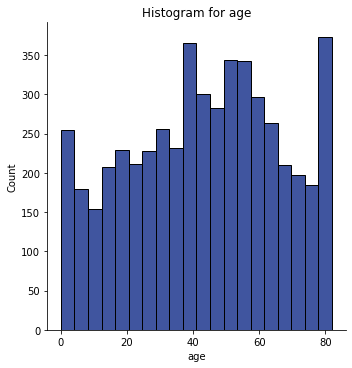

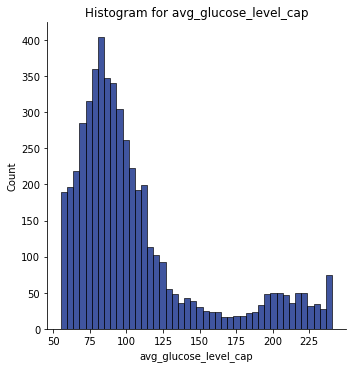

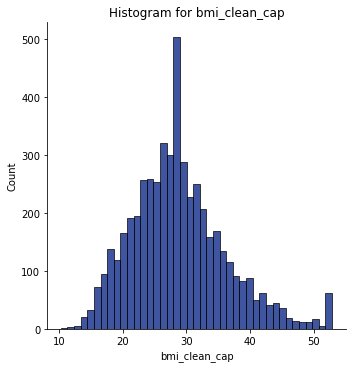

In [366]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['age', 'avg_glucose_level_cap','bmi_clean_cap']:
    sns.displot(stroke[feature], kde=False)
    plt.title(f'Histogram for {feature}')
    plt.show()

- transformation needed for avg_glucose_leve
- bmi slightly skewed 


## Box-Cox Power Transformation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



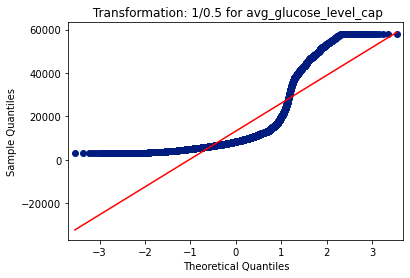

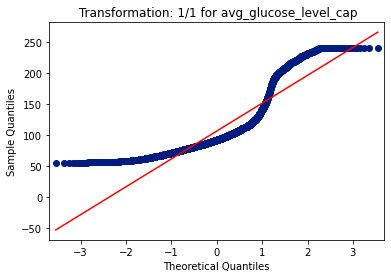

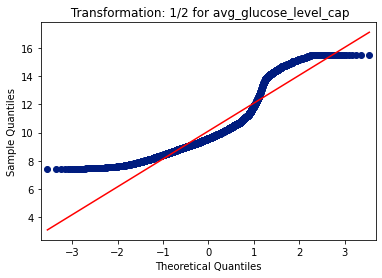

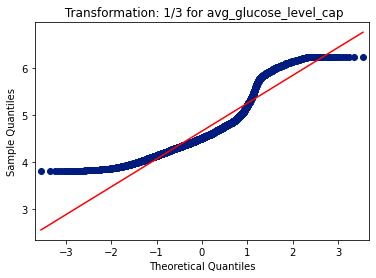

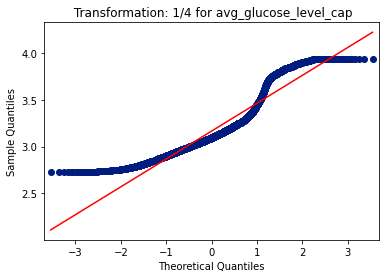

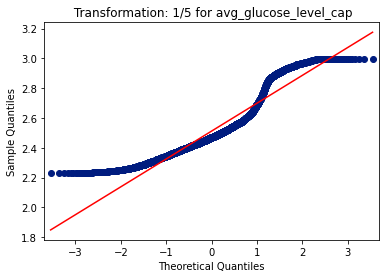

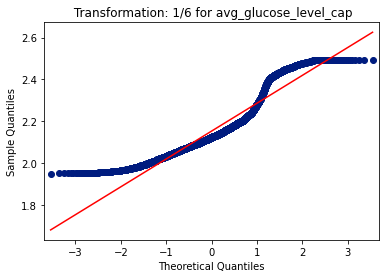

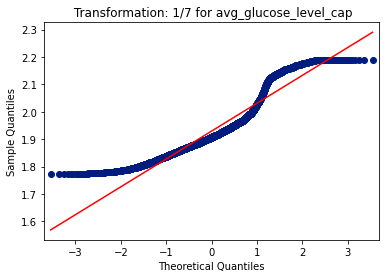

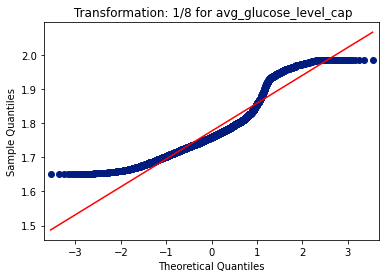

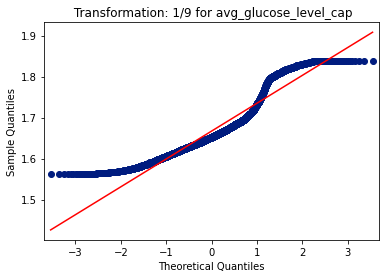

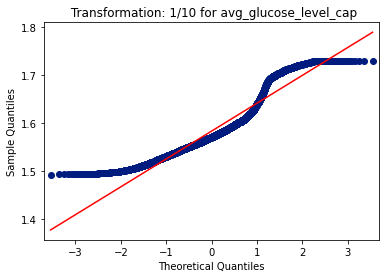

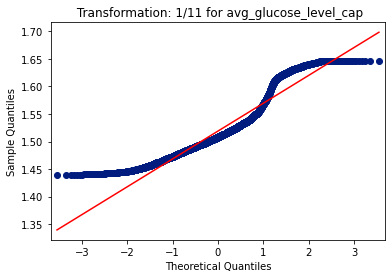

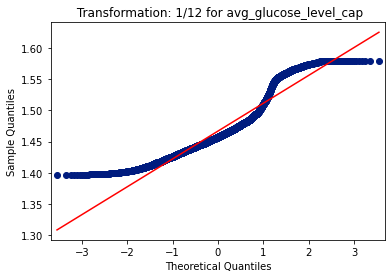

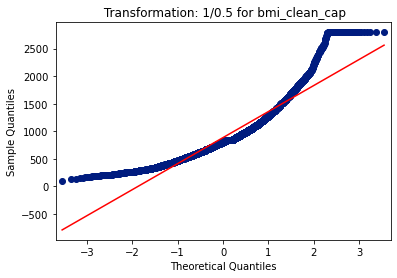

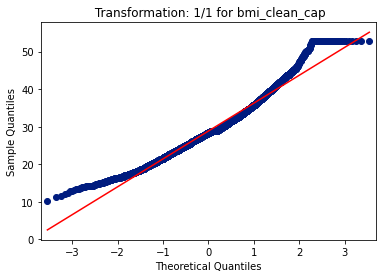

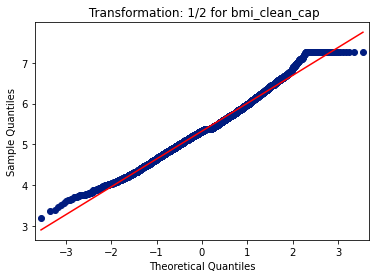

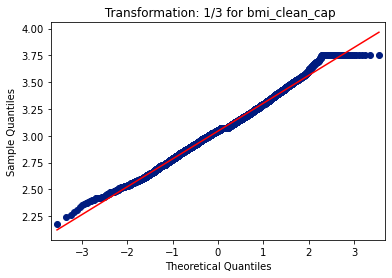

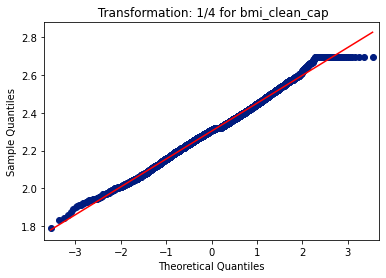

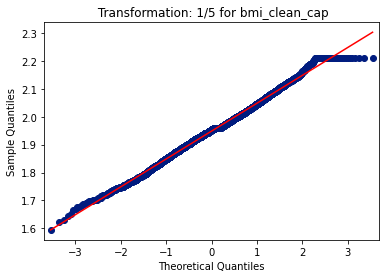

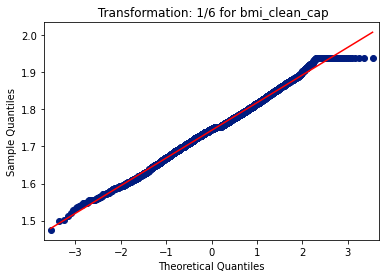

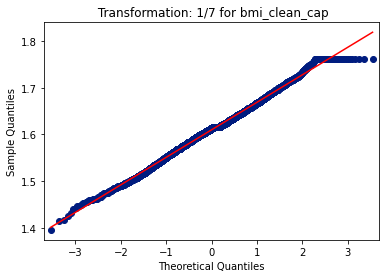

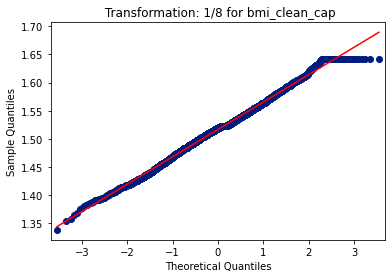

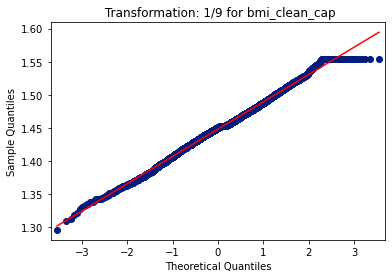

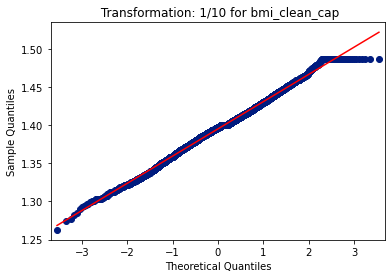

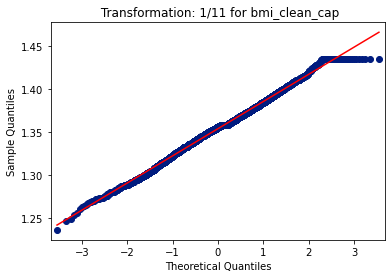

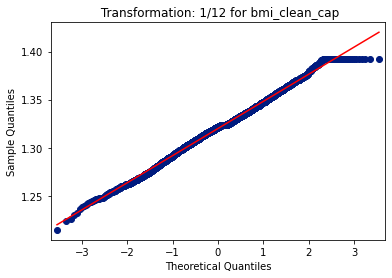

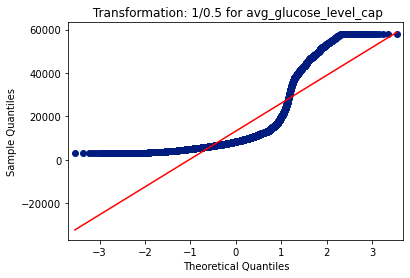

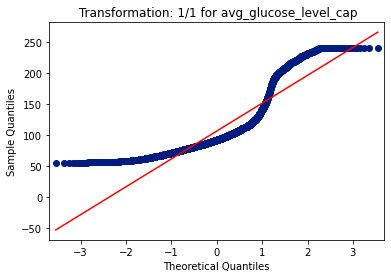

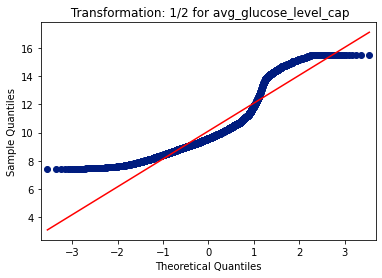

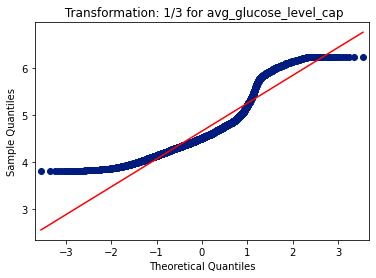

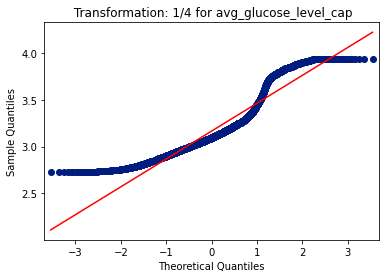

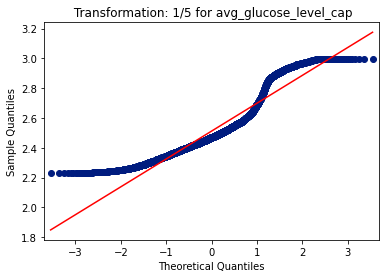

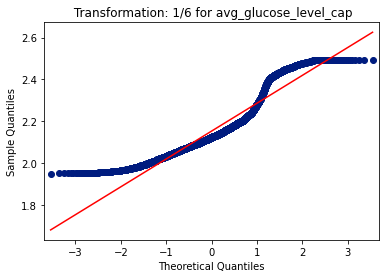

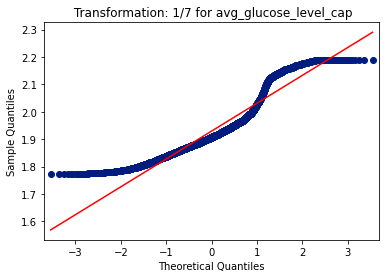

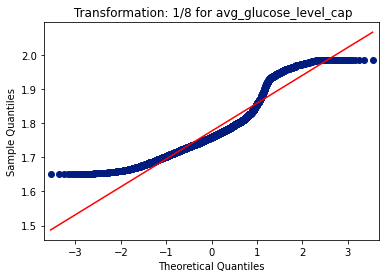

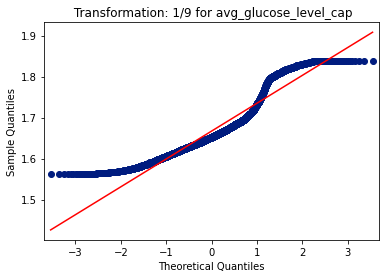

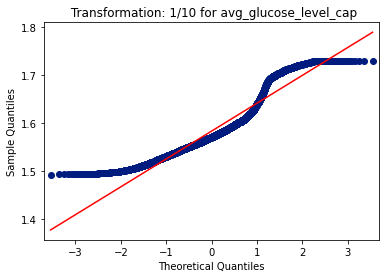

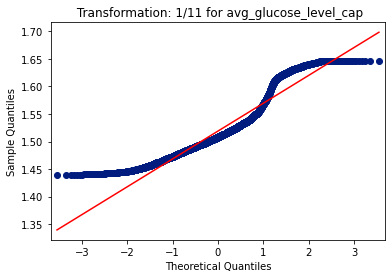

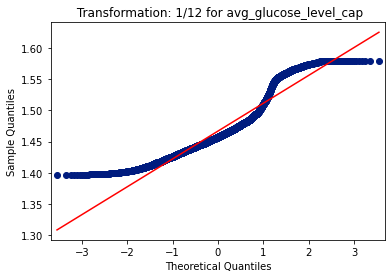

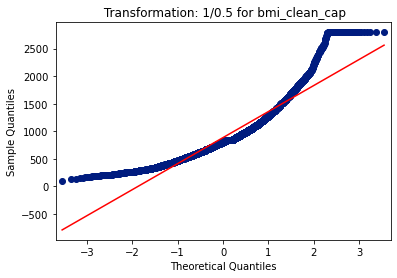

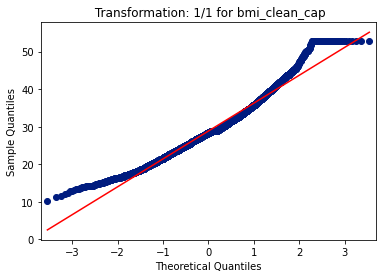

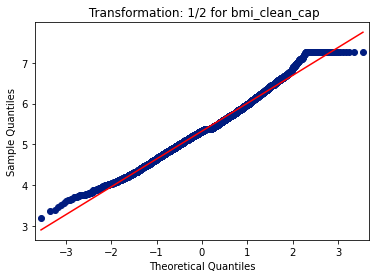

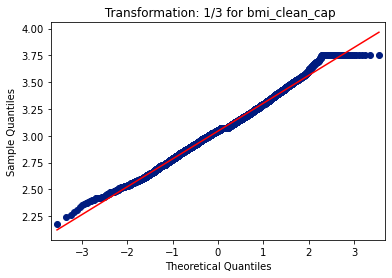

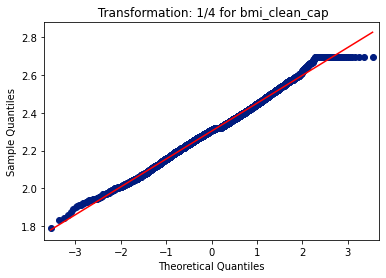

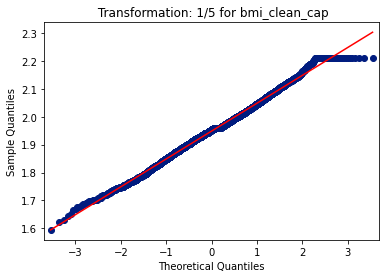

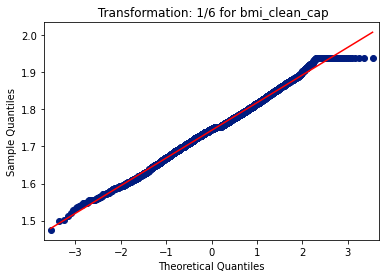

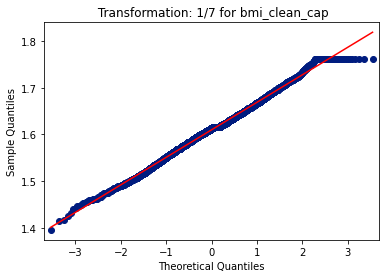

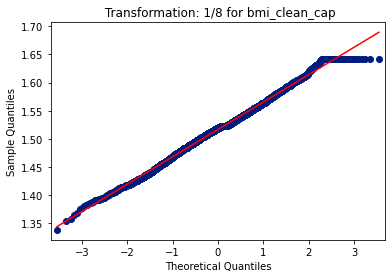

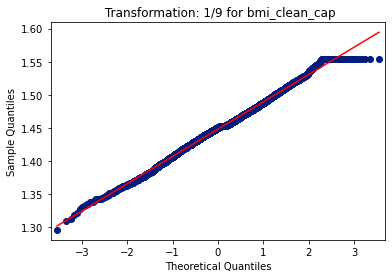

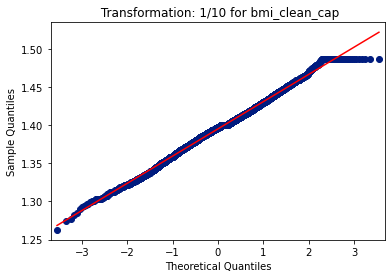

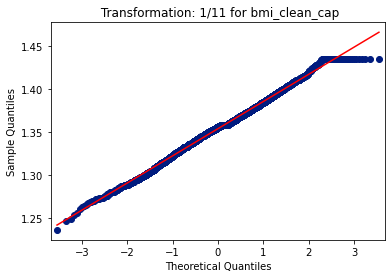

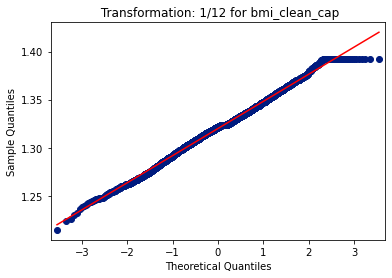

In [367]:
# Generate QQ plots for ech feature
for feat in ['avg_glucose_level_cap', 'bmi_clean_cap', 'avg_glucose_level_cap', 'bmi_clean_cap']:
    for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        data = stroke[feat]**(1/i)
        qqplot(data, line='s')
        plt.title(f' Transformation: 1/{str(i)} for {feat}')

- avg_glucose_level best at 1/7
- bmi best at 1/5

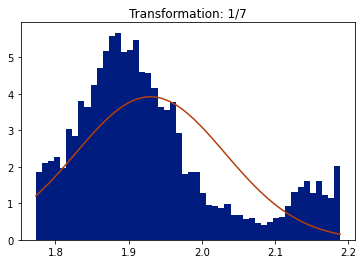

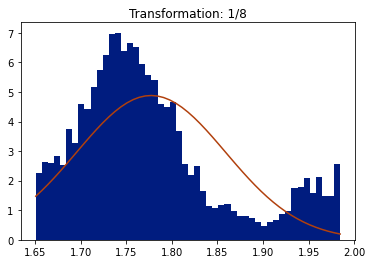

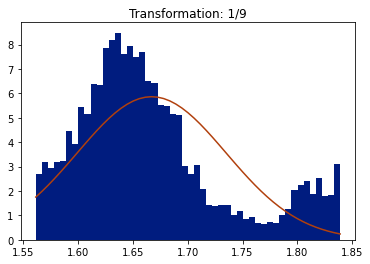

In [368]:
# Box-Cox transformation
for i in [7,8,9]:
    data = stroke['avg_glucose_level_cap']**(1/i)
    n, bins, patches = plt.hist(data, 50, density=True)
    mu = np.mean(data)
    sigma = np.std(data)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title(f'Transformation: 1/{str(i)}')
    plt.show()

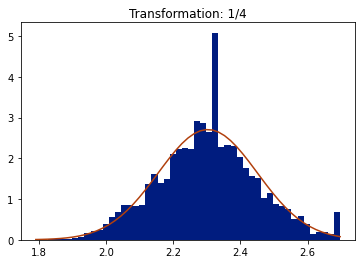

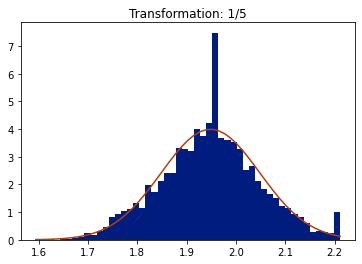

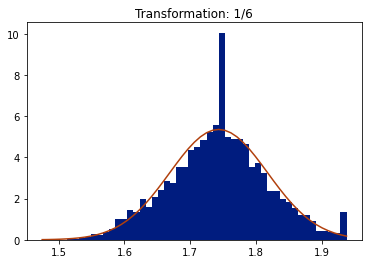

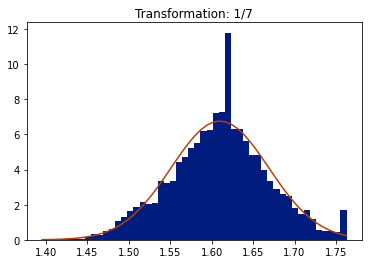

In [369]:
# Box-Cox transformation
for i in [4, 5, 6, 7]:
    data = stroke['bmi_clean_cap']**(1/i)
    n, bins, patches = plt.hist(data, 50, density=True)
    mu = np.mean(data)
    sigma = np.std(data)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title(f'Transformation: 1/{str(i)}')
    plt.show()

- bmi_clean_cap better at 1/7
- I do not see any of the transformation better for avg_glucose_level_cap

In [370]:
# Lets transform bmi_clean_cap only. Will save it as new feature to check if transformation improved this feature
stroke['_trans_bmi_clean_cap']= stroke['bmi_clean_cap'].apply(lambda x:x**(1/7))

In [371]:
stroke.sample(5)

gender   age  hypertension  heart_disease ever_married      work_type  \
185     Male  63.0             0              0          Yes        Private   
3479    Male  53.0             0              1          Yes        Private   
5033  Female  26.0             0              0           No        Private   
1577    Male  48.0             1              0          Yes  Self-employed   
4807  Female  36.0             0              0           No  Self-employed   

     Residence_type  avg_glucose_level  stroke  bmi_clean  \
185           Rural             137.30       1       31.7   
3479          Urban              91.57       0       30.1   
5033          Urban             116.68       0       18.7   
1577          Urban              79.20       0       32.5   
4807          Urban              57.83       0       21.6   

     smoking_status_clean  avg_glucose_level_cap  bmi_clean_cap  \
185       formerly smoked                 137.30           31.7   
3479      formerly smoked                  91.57           30.1   
5033      formerly smoked                 116.68           18.7   
1577         never smoked                  79.20           32.5   
4807               smokes                  57.83           21.6   

      _trans_bmi_clean_cap  
185               1.638465  
3479              1.626387  
5033              1.519468  
1577              1.644309  
4807              1.551087

# <font color = Purple> Converting Categorical Features to Numeric</font>

In [372]:
for features in ['gender','ever_married','work_type','Residence_type','smoking_status_clean']:
    le = LabelEncoder()
    stroke[features]= le.fit_transform(stroke[features].astype(str))

In [373]:
# lets print 6 random samples to check if we actually converted our categorical features to numeric
stroke.sample(6)

gender   age  hypertension  heart_disease  ever_married  work_type  \
4322       1   6.0             0              0             0          4   
4944       1  13.0             0              0             0          4   
2065       1  19.0             0              0             0          2   
4094       1  82.0             0              0             1          3   
2010       0  78.0             0              0             1          2   
3593       0  43.0             0              0             1          3   

      Residence_type  avg_glucose_level  stroke  bmi_clean  \
4322               1              91.89       0       22.4   
4944               1              87.98       0       19.8   
2065               1              73.33       0       23.0   
4094               1             111.81       0       19.8   
2010               0              95.37       0       17.3   
3593               1              87.41       0       39.7   

      smoking_status_clean  avg_glucose_level_cap  bmi_clean_cap  \
4322                     1                  91.89           22.4   
4944                     1                  87.98           19.8   
2065                     1                  73.33           23.0   
4094                     0                 111.81           19.8   
2010                     1                  95.37           17.3   
3593                     0                  87.41           39.7   

      _trans_bmi_clean_cap  
4322              1.559167  
4944              1.531926  
2065              1.565066  
4094              1.531926  
2010              1.502670  
3593              1.691993

# <font color =brown> Splitting our data to training, testing, and evaluation</font>

In [374]:
features=stroke.drop(['stroke'], axis=1)
labels= stroke['stroke']
x_train, x_test, y_train, y_test= train_test_split(features, labels,test_size=0.4, random_state=42)

In [375]:
# now split test set into test and validation
x_val, x_test, y_val,  y_test  = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [376]:
# let check to see if the dataset was splitted as wanted
for dataset in [x_train, y_train, x_test, y_test, x_val, y_val]:
    print(round(len(dataset)/len(labels),2))

0.6
0.6
0.2
0.2
0.2
0.2


In [377]:
# Lets write out our data
x_train.to_csv('/.../.../.../train_features.csv', index=False)
x_test.to_csv('/.../.../.../test_features.csv', index = False)
x_val.to_csv('/.../.../.../val_features.csv', index =False)

y_train.to_csv('/.../.../.../train_labels.csv', index =False)
y_test.to_csv('/.../.../.../test_labels.csv', index =False)
y_val.to_csv('/.../.../.../val_labels.csv', index= False)

# <font color =navy>Standarizing All Features</font>

In [378]:
x_train = pd.read_csv('/.../.../.../train_features.csv')
x_test = pd.read_csv('/.../.../.../test_features.csv')
x_val = pd.read_csv('/.../.../.../val_features.csv')

In [379]:
x_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  64.0             0              1             1          2   
1       0  79.0             1              0             1          2   
2       1  28.0             0              0             0          2   
3       0  73.0             1              1             1          0   
4       0  81.0             0              0             1          2   

   Residence_type  avg_glucose_level  bmi_clean  smoking_status_clean  \
0               0             109.88       33.9                     1   
1               0              64.44       26.9                     0   
2               1              74.61       32.7                     1   
3               1              67.38       32.8                     0   
4               0              91.82       36.9                     1   

   avg_glucose_level_cap  bmi_clean_cap  _trans_bmi_clean_cap  
0                 109.88           33.9              1.654245  
1                  64.44           26.9              1.600480  
2                  74.61           32.7              1.645750  
3                  67.38           32.8              1.646468  
4                  91.82           36.9              1.674407

In [380]:
# fit scalar on the training data
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [381]:
# scale the training, test, and validation sets

features = x_train.columns

x_train[features] = scaler.transform(x_train[features])
x_val[features] = scaler.transform(x_val[features])
x_test[features] = scaler.transform(x_test[features])




In [382]:
# lets check by printing 7 random samples 
x_train.sample(7)

gender       age  hypertension  heart_disease  ever_married  \
530   1.188391  0.884921     -0.314523      -0.240772      0.733221   
2069 -0.841474  1.417813     -0.314523      -0.240772      0.733221   
2666 -0.841474  1.728667      3.179418      -0.240772      0.733221   
3043 -0.841474 -0.669349     -0.314523      -0.240772      0.733221   
1010 -0.841474  0.929328      3.179418      -0.240772      0.733221   
130  -0.841474  1.018144     -0.314523      -0.240772      0.733221   
823  -0.841474 -1.468688     -0.314523      -0.240772     -1.363846   

      work_type  Residence_type  avg_glucose_level  bmi_clean  \
530   -0.133467        0.979979           2.306838   0.243880   
2069  -0.133467        0.979979          -0.427151   1.807905   
2666  -0.133467        0.979979           0.228335   0.296452   
3043  -0.133467       -1.020430          -0.253831  -0.754994   
1010  -0.133467       -1.020430          -0.257409   1.177038   
130    0.777913       -1.020430           2.402332  -0.978426   
823    1.689293        0.979979           0.084983  -1.149286   

      smoking_status_clean  avg_glucose_level_cap  bmi_clean_cap  \
530               0.039692               2.324165       0.261368   
2069              0.039692              -0.427921       1.883603   
2666             -1.698833               0.231904       0.315897   
3043              1.778218              -0.253454      -0.774681   
1010             -1.698833              -0.257056       1.229256   
130               0.039692               2.420291      -1.006429   
823               0.039692               0.087602      -1.183648   

      _trans_bmi_clean_cap  
530               0.365541  
2069              1.711289  
2666              0.417533  
3043             -0.752895  
1010              1.212884  
130              -1.045811  
823              -1.283585

In [383]:
# write out our standarized sets
x_train.to_csv("/.../.../.../train_features.csv", index=False)
x_val.to_csv("/.../.../.../val_features.csv", index=False)
x_test.to_csv("/.../.../.../test_features.csv", index=False)




In [384]:
x_train= pd.read_csv("/.../.../.../train_features.csv")
x_val= pd.read_csv("/.../.../.../val_features.csv")
x_test= pd.read_csv("/.../.../.../test_features.csv")

# <font color = green> Treating Imbalanced Data</font>


# SMOTE

In [4]:
y_train= pd.read_csv('/.../.../.../train_labels.csv')
y_val= pd.read_csv('/.../.../.../val_labels.csv')
y_test= pd.read_csv('/.../.../.../test_labels.csv')

In [5]:
x_train= pd.read_csv("/.../.../.../train_features.csv")
x_val= pd.read_csv("/.../.../.../val_features.csv")
x_test=pd.read_csv("/.../.../.../test_features.csv")



In [8]:
# train set
sm= SMOTE(random_state=42)
x_train_sm, y_train_sm=sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {x_train.shape}
Shape of X after SMOTE: {x_train_sm.shape}''')



Shape of X before SMOTE: (3066, 13)
Shape of X after SMOTE: (5862, 13)


Original dataset: stroke
0         2931
1          135
dtype: int64


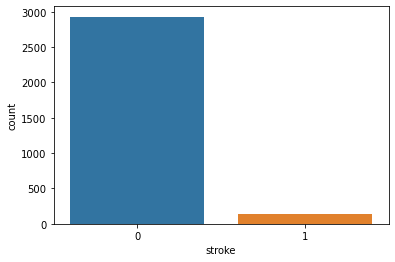

Resampled dataset: stroke
0         2931
1         2931
dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

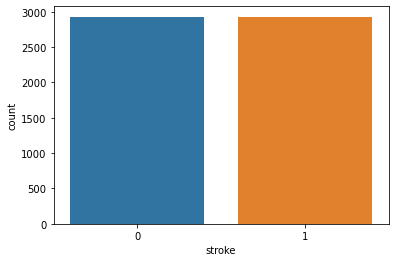

In [9]:
print('Original dataset:',y_train.value_counts())
sns.countplot(y_train['stroke'])
plt.show()
print('Resampled dataset:',y_train_sm.value_counts())
sns.countplot(y_train_sm['stroke'])

In [10]:
# SMOTE validation set
sm = SMOTE(random_state=42)
x_val_sm, y_val_sm = sm.fit_resample(x_val, y_val)

print(f'''Shape of X before SMOTE: {x_val.shape}
Shape of X after SMOTE: {x_val_sm.shape}''')


Shape of X before SMOTE: (1022, 13)
Shape of X after SMOTE: (1944, 13)


Original dataset: stroke
0         972
1          50
dtype: int64


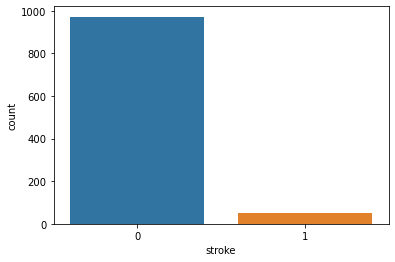

Resampled dataset: stroke
0         972
1         972
dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

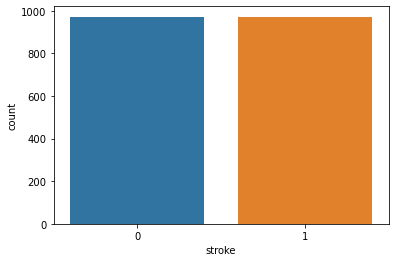

In [11]:
print('Original dataset:',y_val.value_counts())
sns.countplot(y_val['stroke'])
plt.show()
print('Resampled dataset:',y_val_sm.value_counts())
sns.countplot(y_val_sm['stroke'])

In [12]:
# SMOTE on tets set

sm= SMOTE(random_state=42)
x_test_sm, y_test_sm=sm.fit_resample(x_test, y_test)

print(f'''Shape of X before SMOTE: {x_test.shape}
Shape of X after SMOTE: {x_test_sm.shape}''')



Shape of X before SMOTE: (1022, 13)
Shape of X after SMOTE: (1916, 13)


Original dataset: stroke
0         958
1          64
dtype: int64


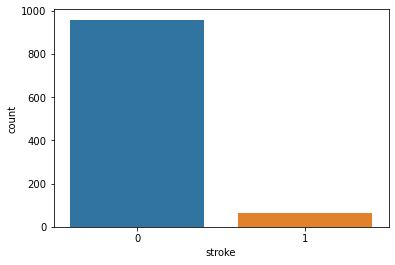

Resampled dataset: stroke
0         958
1         958
dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

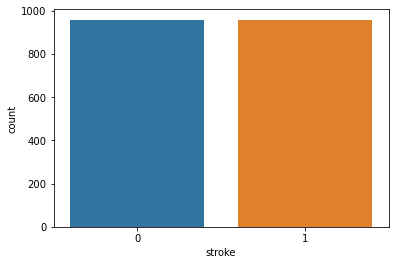

In [13]:
print('Original dataset:',y_test.value_counts())
sns.countplot(y_test['stroke'])
plt.show()
print('Resampled dataset:',y_test_sm.value_counts())
sns.countplot(y_test_sm['stroke'])

In [17]:
# lets define the list of features that will use 
# raw features: all features wihtout any cleaning except filling in null values
raw_features=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi_clean','smoking_status_clean']
# reduced raw features: raw features minus smoking_status_clean as it has many missing values, and bmi as it has missing values 
reduced_raw_features= ['gender','age','hypertension','heart_disease','avg_glucose_level','work_type','Residence_type','ever_married']
# clean features drop 'ever_married', work type, residency as they are weakly correlated and use the transformed bmi
clean_features_reduced=['gender','age','hypertension','heart_disease','avg_glucose_level_cap','_trans_bmi_clean_cap']




In [18]:
# writting out our raw features
x_train_sm[raw_features].to_csv("/.../.../.../train_raw_features_sm.csv", index=False)
x_val_sm[raw_features].to_csv("/.../.../.../val_raw_features_sm.csv", index=False)
x_test_sm[raw_features].to_csv("/.../.../.../test_raw_features_sm.csv", index=False)

In [19]:
# writting out our reduced raw features
x_train_sm[reduced_raw_features].to_csv("/.../.../.../train_reduced_raw_features_sm.csv", index=False)
x_val_sm[reduced_raw_features].to_csv("/.../.../.../val_reduced_raw_features_sm.csv", index=False)
x_test_sm[reduced_raw_features].to_csv("/.../.../.../test_reduced_raw_features_sm.csv", index=False)

In [20]:
# writting clean features
x_train_sm[clean_features_reduced].to_csv("/.../.../.../train_clean_features_reduced_sm.csv", index=False)
x_val_sm[clean_features_reduced].to_csv("/.../.../.../val_clean_features_reduced_sm.csv", index=False)
x_test_sm[clean_features_reduced].to_csv("/.../.../.../test_clean_features_reduced_sm.csv", index=False)

# <font color=Red>Boosting</font>

In [19]:
# lets get parameters for GradientBoostingClassifier
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# <font color =green> Hyperparameter Tuning</font>

# Raw Features

In [21]:
# raw features - SMOTE
train_raw_feaures= pd.read_csv("/.../.../.../train_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [22]:
train_raw_feaures.sample(3)

gender       age  hypertension  heart_disease  ever_married  \
4010 -0.312508  1.141676      3.179418       4.153312      0.186743   
2982  1.188391  0.396436     -0.314523      -0.240772      0.733221   
3253 -0.841474  1.470417     -0.314523      -0.240772      0.733221   

      work_type  Residence_type  avg_glucose_level  bmi_clean  \
4010  -0.608463        0.458688           2.997742   1.203103   
2982  -1.956227        0.979979          -0.273287   0.979892   
3253  -0.133467        0.979979          -1.062734  -0.050509   

      smoking_status_clean  
4010             -1.245788  
2982              0.039692  
3253             -1.538394

<AxesSubplot:xlabel='stroke', ylabel='count'>

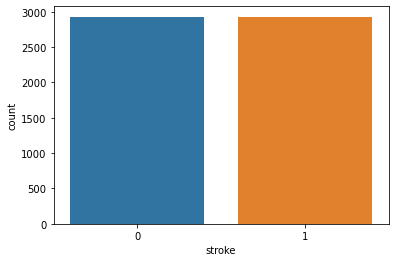

In [24]:
sns.countplot(train_label['stroke'])

In [25]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10]
}
cv = GridSearchCV(gb, parameters, cv=5, verbose=3, scoring='f1')# set verbose to 3 to get detailed info 
cv.fit(train_raw_feaures, train_label.values.ravel())




Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.812 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.805 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.820 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.811 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.839 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.812 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.805 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.820 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.811 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.839 total time= 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [26]:
cv.best_estimator_ 

GradientBoostingClassifier(max_depth=7, n_estimators=250)

In [27]:
cv.best_score_

0.9635786819866139

In [28]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../...//models/mdl1_raw_features_fully_sm_1.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl1_raw_features_fully_sm_1.pkl']

# Reduced Raw Features

In [29]:
reduced_raw_features= pd.read_csv("/.../.../.../train_reduced_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [30]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(gb, parameters, cv=5, verbose=3, scoring='f1')
cv.fit(reduced_raw_features, train_label.values.ravel())




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.812 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.805 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.820 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.811 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.839 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.812 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.805 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.820 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.811 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.839 total time=

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [31]:
cv.best_estimator_

GradientBoostingClassifier(max_depth=7, n_estimators=250)

In [32]:
cv.best_score_

0.9546564061121525

In [33]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl1_reduced_raw_features_fully_sm_2.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl1_reduced_raw_features_fully_sm_2.pkl']

# Clean Reduced Features

In [34]:
clean_reduced_features= pd.read_csv("/.../.../.../train_clean_features_reduced_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [36]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(gb, parameters, cv=5, verbose=3, scoring='f1')
cv.fit(clean_reduced_features, train_label.values.ravel())




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.812 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.805 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.820 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.811 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.839 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.812 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.805 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.820 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.811 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.839 total time=

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [37]:
cv.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [38]:
cv.best_score_

0.9527233390911306

In [39]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl1_reduced_clean_features_fully_sm_3.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl1_reduced_clean_features_fully_sm_3.pkl']

# <font color =Red> Bagging</font>

In [40]:
# lets get parameters for GradientBoostingClassifier
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# <font color =green> Hyperparameter Tuning</font>

In [42]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.



# Raw Features

In [43]:

# raw features - SMOTE
train_raw_feaures= pd.read_csv("/.../.../.../train_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [44]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],# parameter 1 to be tuned, default =100
    'max_depth': [4, 8, 16, 32, None]# paramter 2 to be tuned # default=none means goes as deep as it needs
}

cv = GridSearchCV(rf, parameters, cv=5, verbose=3, scoring='f1')# five fold cross validation
cv.fit(train_raw_feaures, train_label.values.ravel())#.ravel to convert to array gets error otherwise



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......max_depth=4, n_estimators=5;, score=0.824 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=5;, score=0.839 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=5;, score=0.840 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=5;, score=0.816 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=5;, score=0.866 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=50;, score=0.827 total time=   0.2s
[CV 2/5] END ......max_depth=4, n_estimators=50;, score=0.830 total time=   0.1s
[CV 3/5] END ......max_depth=4, n_estimators=50;, score=0.831 total time=   0.1s
[CV 4/5] END ......max_depth=4, n_estimators=50;, score=0.829 total time=   0.1s
[CV 5/5] END ......max_depth=4, n_estimators=50;, score=0.859 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=250;, score=0.827 total time=   0.6s
[CV 2/5] END .....max_depth=4, n_estimators=250

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [45]:
cv.best_estimator_ 

RandomForestClassifier(max_depth=32, n_estimators=500)

In [46]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl2_raw_features_bagging_fully_sm_1.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl2_raw_features_bagging_fully_sm_1.pkl']

In [47]:
cv.best_score_

0.959670256959957

# Reduced Raw Features

In [48]:
reduced_raw_features= pd.read_csv("/.../.../.../train_reduced_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [49]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],# parameter 1 to be tuned, default =100
    'max_depth': [4, 8, 16, 32, None]# paramter 2 to be tuned # default=none means goes as deep as it needs
}

cv = GridSearchCV(rf, parameters, cv=5, verbose=3, scoring='f1')# five fold cross validation
cv.fit(reduced_raw_features, train_label.values.ravel())#.ravel to convert to array gets error otherwise



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......max_depth=4, n_estimators=5;, score=0.824 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=5;, score=0.819 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=5;, score=0.843 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=5;, score=0.826 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=50;, score=0.830 total time=   0.1s
[CV 2/5] END ......max_depth=4, n_estimators=50;, score=0.826 total time=   0.1s
[CV 3/5] END ......max_depth=4, n_estimators=50;, score=0.836 total time=   0.1s
[CV 4/5] END ......max_depth=4, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END ......max_depth=4, n_estimators=50;, score=0.864 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=250;, score=0.818 total time=   0.5s
[CV 2/5] END .....max_depth=4, n_estimators=250

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [50]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=50)

In [51]:
cv.best_score_

0.9457677629238976

In [52]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl2_reduced_raw_features_bagging_fully_sm_2.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl2_reduced_raw_features_bagging_fully_sm_2.pkl']

# clean features reduced

In [53]:
clean_reduced_features= pd.read_csv("/.../.../.../train_clean_features_reduced_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [54]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],# parameter 1 to be tuned, default =100
    'max_depth': [4, 8, 16, 32, None]# paramter 2 to be tuned # default=none means goes as deep as it needs
}

cv = GridSearchCV(rf, parameters, cv=5, verbose=3, scoring='f1')# five fold cross validation
cv.fit(clean_reduced_features, train_label.values.ravel())#.ravel to convert to array gets error otherwise





Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......max_depth=4, n_estimators=5;, score=0.824 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=5;, score=0.820 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=5;, score=0.826 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=5;, score=0.817 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=5;, score=0.850 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=50;, score=0.825 total time=   0.2s
[CV 2/5] END ......max_depth=4, n_estimators=50;, score=0.817 total time=   0.1s
[CV 3/5] END ......max_depth=4, n_estimators=50;, score=0.819 total time=   0.1s
[CV 4/5] END ......max_depth=4, n_estimators=50;, score=0.818 total time=   0.1s
[CV 5/5] END ......max_depth=4, n_estimators=50;, score=0.852 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=250;, score=0.827 total time=   0.6s
[CV 2/5] END .....max_depth=4, n_estimators=250

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='f1', verbose=3)

In [55]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=250)

In [56]:
cv.best_score_

0.914845606914097

In [57]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl2_reduced_clean_features_bagging_fully_sm_3.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl2_reduced_clean_features_bagging_fully_sm_3.pkl']

# <font color =Red>Stacking</font>

In [58]:
estimators= [('gb', GradientBoostingClassifier()), ('rf',RandomForestClassifier())]# 1st entry:  what you want to name the model, 2nd entry: the actual algorithm
StackingClassifier(estimators=estimators).get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

# <font color =green> Hyperparameter Tuning</font>

In [59]:
estimators= [('gb', GradientBoostingClassifier()), ('rf',RandomForestClassifier())]# 1st entry:  what you want to name the model, 2nd entry: the actual algorithm

sc= StackingClassifier(estimators=estimators)
sc.get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

# Raw Features

In [60]:
# raw features - SMOTE
train_raw_feaures= pd.read_csv("/.../.../.../train_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [61]:
# Conduct search for best params while running cross-validation (GridSearchCV)
parameters = {
    'gb__n_estimators': [50,100],# parameter 1 to be tuned, default =100
    'rf__n_estimators': [50,100],
    'final_estimator': [LogisticRegression(C=0.1), # metamodel
                       LogisticRegression(C=1),
                       LogisticRegression(C=10)],
    'passthrough':[True, False]# this controls whether the model fits only on the output of base models or if also uses the original training data, set to tru means include training data, set false means only include the output from the two base models
}

cv = GridSearchCV(sc, parameters, cv=5, verbose=3, scoring='f1')# five fold cross validation
cv.fit(train_raw_feaures, train_label.values.ravel())#.ravel to convert to array gets error otherwise





Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.911 total time=   2.3s
[CV 2/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.964 total time=   2.4s
[CV 3/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.965 total time=   2.5s
[CV 4/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.956 total time=   2.3s
[CV 5/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.970 total time=   2.1s
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=100;, score=0.910 total time=   3.4s
[CV 2/5] END final_estimator=LogisticRegression(C

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('gb',
                                                       GradientBoostingClassifier()),
                                                      ('rf',
                                                       RandomForestClassifier())]),
             param_grid={'final_estimator': [LogisticRegression(C=0.1),
                                             LogisticRegression(C=1),
                                             LogisticRegression(C=10)],
                         'gb__n_estimators': [50, 100],
                         'passthrough': [True, False],
                         'rf__n_estimators': [50, 100]},
             scoring='f1', verbose=3)

In [62]:
cv.best_estimator_ 

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=50)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(C=10))

In [63]:
cv.best_score_

0.9625599407089371

In [64]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl3_raw_features_stacking_fully_sm_1.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl3_raw_features_stacking_fully_sm_1.pkl']

# Reduced Raw Features

In [65]:
reduced_raw_features= pd.read_csv("/.../.../.../train_reduced_raw_features_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")

In [67]:
# Conduct search for best params while running cross-validation (GridSearchCV)
parameters = {
    'gb__n_estimators': [50,100],# parameter 1 to be tuned, default =100
    'rf__n_estimators': [50,100],
    'final_estimator': [LogisticRegression(C=0.1), # metamodel
                       LogisticRegression(C=1),
                       LogisticRegression(C=10)],
    'passthrough':[True, False]# this controls whether the model fits only on the output of base models or if also uses the original training data, set to tru means include training data, set false means only include the output from the two base models
}

cv = GridSearchCV(sc, parameters, cv=5, verbose=3, scoring ='f1')# five fold cross validation
cv.fit(reduced_raw_features, train_label.values.ravel())#.ravel to convert to array gets error otherwise



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.897 total time=   1.8s
[CV 2/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.949 total time=   1.7s
[CV 3/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.948 total time=   1.6s
[CV 4/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.949 total time=   1.6s
[CV 5/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.956 total time=   1.6s
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=100;, score=0.898 total time=   2.4s
[CV 2/5] END final_estimator=LogisticRegression(C

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('gb',
                                                       GradientBoostingClassifier()),
                                                      ('rf',
                                                       RandomForestClassifier())]),
             param_grid={'final_estimator': [LogisticRegression(C=0.1),
                                             LogisticRegression(C=1),
                                             LogisticRegression(C=10)],
                         'gb__n_estimators': [50, 100],
                         'passthrough': [True, False],
                         'rf__n_estimators': [50, 100]},
             scoring='f1', verbose=3)

In [68]:
cv.best_estimator_

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=50)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(C=10), passthrough=True)

In [69]:
cv.best_score_

0.9452200406318354

In [70]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl3_reduced_raw_features_stacking_fully_sm_2.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl3_reduced_raw_features_stacking_fully_sm_2.pkl']

# Clean Reduced Features

In [75]:
clean_reduced_features= pd.read_csv("/.../.../.../train_clean_features_reduced_sm.csv")
train_label= pd.read_csv("/.../.../.../y_train_sm.csv")


In [76]:
# Conduct search for best params while running cross-validation (GridSearchCV)
parameters = {
    'gb__n_estimators': [50,100],# parameter 1 to be tuned, default =100
    'rf__n_estimators': [50,100],
    'final_estimator': [LogisticRegression(C=0.1), # metamodel
                       LogisticRegression(C=1),
                       LogisticRegression(C=10)],
    'passthrough':[True, False]# this controls whether the model fits only on the output of base models or if also uses the original training data, set to tru means include training data, set false means only include the output from the two base models
}

cv = GridSearchCV(sc, parameters, cv=5, verbose=3,scoring='f1')# five fold cross validation
cv.fit(clean_reduced_features, train_label.values.ravel())#.ravel to convert to array gets error otherwise




Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.887 total time=   2.1s
[CV 2/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.908 total time=   1.9s
[CV 3/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.916 total time=   1.9s
[CV 4/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.911 total time=   2.0s
[CV 5/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=50;, score=0.926 total time=   2.0s
[CV 1/5] END final_estimator=LogisticRegression(C=0.1), gb__n_estimators=50, passthrough=True, rf__n_estimators=100;, score=0.892 total time=   2.9s
[CV 2/5] END final_estimator=LogisticRegression(C

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('gb',
                                                       GradientBoostingClassifier()),
                                                      ('rf',
                                                       RandomForestClassifier())]),
             param_grid={'final_estimator': [LogisticRegression(C=0.1),
                                             LogisticRegression(C=1),
                                             LogisticRegression(C=10)],
                         'gb__n_estimators': [50, 100],
                         'passthrough': [True, False],
                         'rf__n_estimators': [50, 100]},
             scoring='f1', verbose=3)

In [77]:
cv.best_estimator_

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=50)),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression(C=10), passthrough=True)

In [78]:
cv.best_score_

0.9208070617512583

In [79]:
# wrtite out pickled model
joblib.dump(cv.best_estimator_, '/.../.../.../models/mdl3_reduced_clean_features_stacking_fully_sm_3.pkl')

['/Users/sarahalbadri/Desktop/stroke_prediction_Fully_balanced/models/mdl3_reduced_clean_features_stacking_fully_sm_3.pkl']

# <font color = brown>Compare and evaluate all models to choose the bets model to be evaluated on the test set</font>

In [80]:
# lets read fetaures and label for validation

val_raw_features_sm =pd.read_csv("/.../.../.../val_raw_features_sm.csv")
val_reduced_raw_features_sm=pd.read_csv(" /.../.../.../val_reduced_raw_features_sm.csv")
val_clean_features_reduced_sm = pd.read_csv("/.../.../.../val_clean_features_reduced_sm.csv")

# reading labels
val_label_sm= pd.read_csv("/.../.../.../y_val_sm.csv")




In [81]:
# lets read in our model
models={}

for mdl in ['1_raw_features_fully_sm_1','2_raw_features_bagging_fully_sm_1','1_reduced_raw_features_fully_sm_2','2_reduced_clean_features_bagging_fully_sm_3','2_reduced_raw_features_bagging_fully_sm_2','3_raw_features_stacking_fully_sm_1', '3_reduced_clean_features_stacking_fully_sm_3', '3_reduced_raw_features_stacking_fully_sm_2', '1_reduced_clean_features_fully_sm_3']:
    models[mdl]=joblib.load("/.../.../.../models/mdl{}.pkl".format(mdl))


In [85]:
# define fun to evalute our models
def model_evaluation(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f_one= round(f1_score(labels, pred),3)
    print(f'{name} -- \tAccuracy: {accuracy} / Precision: {precision} / Recall: {recall} /F1 Score:{f_one} / Latency: {round((end - start)*1000, 1)}ms')
                                                                                   

In [86]:
#Evaluate our models on validation set

model_evaluation('Raw Features Boosting', models['1_raw_features_fully_sm_1'],val_raw_features_sm,val_label_sm) 
model_evaluation('Raw Features Bagging', models['2_raw_features_bagging_fully_sm_1'],val_raw_features_sm,val_label_sm) 
model_evaluation('Raw Features Stacking', models['3_raw_features_stacking_fully_sm_1'],val_raw_features_sm,val_label_sm)

model_evaluation('Reduced Raw Features Boosting', models['1_reduced_raw_features_fully_sm_2'],val_reduced_raw_features_sm,val_label_sm) 
model_evaluation('Reduced Raw Features Bagging', models['2_reduced_raw_features_bagging_fully_sm_2'],val_reduced_raw_features_sm,val_label_sm)
model_evaluation('Reduced Raw Features Stacking', models['3_reduced_raw_features_stacking_fully_sm_2'],val_reduced_raw_features_sm,val_label_sm)


model_evaluation('reduced_clean_features Boosting', models['1_reduced_clean_features_fully_sm_3'],val_clean_features_reduced_sm,val_label_sm) 
model_evaluation('reduced_clean_features Bagging',models['2_reduced_clean_features_bagging_fully_sm_3'],val_clean_features_reduced_sm,val_label_sm)           
model_evaluation('reduced_clean_features stacking',models['3_reduced_clean_features_stacking_fully_sm_3'],val_clean_features_reduced_sm,val_label_sm) 

Raw Features Boosting -- 	Accuracy: 0.912 / Precision: 0.981 / Recall: 0.841 /F1 Score:0.905 / Latency: 22.3ms
Raw Features Bagging -- 	Accuracy: 0.81 / Precision: 0.955 / Recall: 0.651 /F1 Score:0.774 / Latency: 171.9ms
Raw Features Stacking -- 	Accuracy: 0.776 / Precision: 0.95 / Recall: 0.582 /F1 Score:0.722 / Latency: 30.9ms
Reduced Raw Features Boosting -- 	Accuracy: 0.914 / Precision: 0.973 / Recall: 0.852 /F1 Score:0.908 / Latency: 16.1ms
Reduced Raw Features Bagging -- 	Accuracy: 0.798 / Precision: 0.915 / Recall: 0.656 /F1 Score:0.765 / Latency: 18.6ms
Reduced Raw Features Stacking -- 	Accuracy: 0.813 / Precision: 0.924 / Recall: 0.683 /F1 Score:0.785 / Latency: 37.0ms
reduced_clean_features Boosting -- 	Accuracy: 0.881 / Precision: 0.974 / Recall: 0.783 /F1 Score:0.868 / Latency: 16.3ms
reduced_clean_features Bagging -- 	Accuracy: 0.681 / Precision: 0.815 / Recall: 0.467 /F1 Score:0.594 / Latency: 67.1ms
reduced_clean_features stacking -- 	Accuracy: 0.66 / Precision: 0.825 / 

### Accuracy:  the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage.

### Precision:is the number of True Positives divided by the number of True Positives and False Positives. we can think of it as the number of positive predictions divided by the total number of positive class values predicted. It is also called the Positive Predictive Value (PPV).Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives.


### Recall: is the number of True Positives divided by the number of True Positives and the number of False Negatives. We can think of it as the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity or the True Positive Rate. Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives.


### F1 score: the precision time recal divided by precision time the recall. al lmultiplied by 2. F1 score used to measure models accuracy on a dataset. It is used to evaluate binary classification systems



- <font color = Green> Since we aim to predict stroke in patients , we want our model to have lowest false negative (highest recall).And, highest F1-score. We also hope for lowest false posative (highest precision) and higher accuracy. From the models above we see Boosting (on reduced raw features) has the highest recall, Accuracy,  precision, and F1 score comparing to Stacking and Bagging. Since we are aiming for best recall, and F1 Score, we will choose  Boosting on Reduced Raw features as the best model. 

# Reduced Raw Features Boosting is the best
    

# <font color = Purple> Evaluate our best model on test set</font>

In [87]:
# read in our test feature and test label (note that test set was not balanced)
test_features_reduced_raw_sm=pd.read_csv("/.../.../.../test_reduced_raw_features_sm.csv")
test_label_sm = pd.read_csv("/.../.../.../y_test_sm.csv")

In [88]:
# lets check how well does our model generalize by evaluating it on unseen and balanced test set(note that this test set was balanced using SMOTE)
model_evaluation('Test Reduced Raw Features Boosting', models['1_reduced_raw_features_fully_sm_2'],test_features_reduced_raw_sm,test_label_sm) 





Test Reduced Raw Features Boosting -- 	Accuracy: 0.935 / Precision: 0.983 / Recall: 0.886 /F1 Score:0.932 / Latency: 18.5ms
